In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
data_train = {
    'Model': ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n'],
    'Epochs': [20, 20, 20, 20, 20, 20, 20],
    'Batch Size': [10, 10, 10, 10, 10, 10, 10],
    'Training Time (hours)': [3.136, 3.494, 3.384, 4.290, 4.305, 3.250, 4.061],
    
    # Train Set Metrics
    'Train_Person_Precision': [0.817, 0.789, 0.806, 0.778, 0.669, 0.78, 0.718],
    'Train_Person_Recall': [0.634, 0.652, 0.67, 0.648, 0.663, 0.638, 0.607],
    'Train_Person_mAP': [0.749, 0.717, 0.753, 0.732, 0.681, 0.716, 0.683],
    'Train_Car_Precision': [0.875, 0.826, 0.872, 0.88, 0.704, 0.734, 0.789],
    'Train_Car_Recall': [0.757, 0.744, 0.772, 0.773, 0.748, 0.832, 0.739],
    'Train_Car_mAP': [0.85, 0.825, 0.861, 0.855, 0.796, 0.846, 0.805],
    'Train_Bicycle_Precision': [0.613, 0.651, 0.643, 0.664, 0.585, 0.525, 0.639],
    'Train_Bicycle_Recall': [0.579, 0.453, 0.576, 0.552, 0.466, 0.588, 0.401],
    'Train_Bicycle_mAP': [0.612, 0.517, 0.613, 0.579, 0.512, 0.551, 0.508],
}

train_results = pd.DataFrame(data_train)

In [7]:
train_results

,Model,Epochs,Batch Size,Training Time (hours),Train_Person_Precision,Train_Person_Recall,Train_Person_mAP,Train_Car_Precision,Train_Car_Recall,Train_Car_mAP,Train_Bicycle_Precision,Train_Bicycle_Recall,Train_Bicycle_mAP
0,YOLOv5n,20,10,3.136,0.817,0.634,0.749,0.875,0.757,0.850,0.613,0.579,0.612
1,YOLOv6n,20,10,3.494,0.789,0.652,0.717,0.826,0.744,0.825,0.651,0.453,0.517
2,YOLOv8n,20,10,3.384,0.806,0.670,0.753,0.872,0.772,0.861,0.643,0.576,0.613
3,YOLOv9t,20,10,4.290,0.778,0.648,0.732,0.880,0.773,0.855,0.664,0.552,0.579
4,YOLOv10n,20,10,4.305,0.669,0.663,0.681,0.704,0.748,0.796,0.585,0.466,0.512
5,YOLOv11n,20,10,3.250,0.780,0.638,0.716,0.734,0.832,0.846,0.525,0.588,0.551
6,YOLOv12n,20,10,4.061,0.718,0.607,0.683,0.789,0.739,0.805,0.639,0.401,0.508


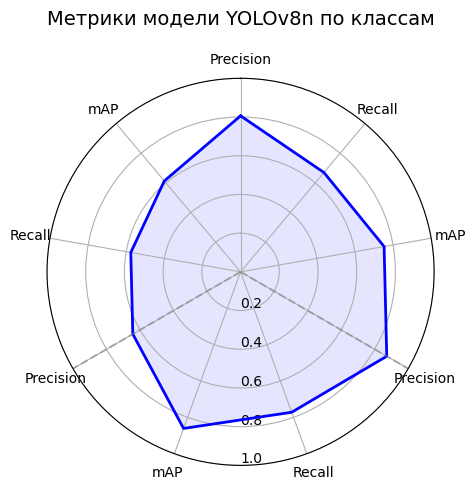

In [11]:
# Выбор модели (можно поменять)
selected_model = 'YOLOv8n'
model_data = train_results[train_results['Model'] == selected_model].iloc[0]

# Метрики для Radar Chart
metrics = {
    'Person': ['Train_Person_Precision', 'Train_Person_Recall', 'Train_Person_mAP'],
    'Car': ['Train_Car_Precision', 'Train_Car_Recall', 'Train_Car_mAP'],
    'Bicycle': ['Train_Bicycle_Precision', 'Train_Bicycle_Recall', 'Train_Bicycle_mAP']
}

# Названия для осей
labels = ['Precision', 'Recall', 'mAP']

# Данные для графика (нормализация времени: меньше = лучше)
def prepare_data(metrics_dict, model_row):
    values = []
    for category, cols in metrics_dict.items():
        if category == 'Time':
            time_val = model_row[cols[0]]
            values.append(1 - (time_val / max(train_results['Training Time (hours)'])))
        else:
            for col in cols:
                values.append(model_row[col])
    return values

data = prepare_data(metrics, model_data)

# Углы для осей (12 метрик: 3 класса * 3 метрики + время)
angles = np.linspace(0, 2 * np.pi, len(data), endpoint=False).tolist()
angles += angles[:1]  # Замыкаем круг
data += data[:1]

# Создание Radar Chart
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Отрисовка
ax.plot(angles, data, linewidth=2, linestyle='solid', label=selected_model, color='blue')
ax.fill(angles, data, alpha=0.1, color='blue')

# Настройка осей
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(180)

# Подписи (группировка по классам)
class_divisions = np.cumsum([len(v) for v in metrics.values()][:-1])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels * 3, fontsize=10)

# Линии-разделители классов
for div in class_divisions:
    ax.plot([angles[div], angles[div]], [0, 1], color='gray', linestyle='--', alpha=0.5)

# Подписи классов
#for i, (class_name, pos) in enumerate(zip(metrics.keys(), np.linspace(0, 2*np.pi, len(metrics), endpoint=False))):
    #ax.text(pos, 1.1, class_name, ha='center', va='center', fontsize=12, weight='bold')

# Легенда и заголовок
plt.title(f'Метрики модели {selected_model} по классам', pad=20, fontsize=14)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

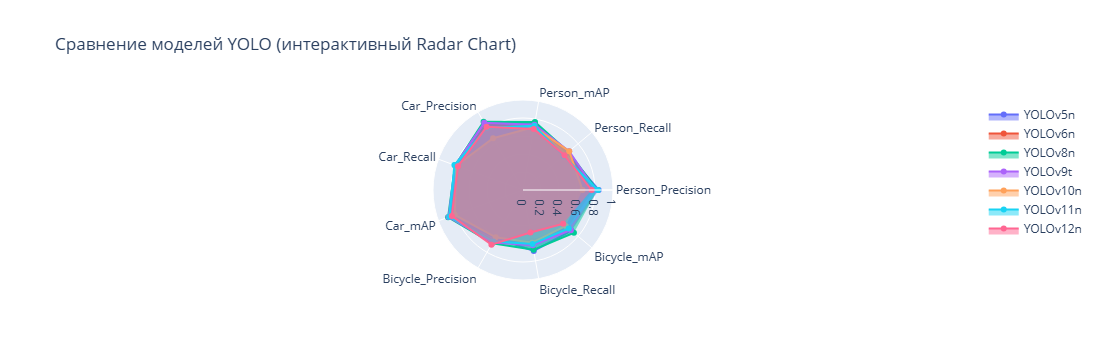

In [86]:
import plotly.express as px
import plotly.graph_objects as go

# Подготовка данных в "длинном" формате
df_melted = test_results.melt(id_vars='Model', value_vars=categories, 
                             var_name='Metric', value_name='Value')

# Создание radar chart
fig = go.Figure()

for model in test_results['Model']:
    fig.add_trace(go.Scatterpolar(
        r=df_melted[df_melted['Model'] == model]['Value'],
        theta=df_melted[df_melted['Model'] == model]['Metric'],
        fill='toself',
        name=model
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title='Сравнение моделей YOLO (интерактивный Radar Chart)'
)

fig.show()

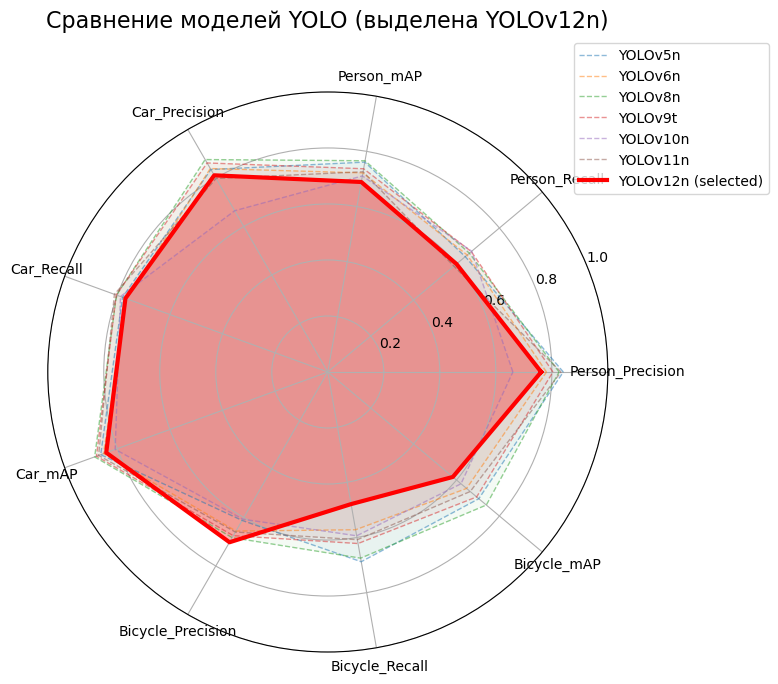

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Данные
data_test = {
    'Model': ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n'],
    'Test_Person_Precision': [0.841, 0.781, 0.826, 0.804, 0.661, 0.833, 0.762],
    'Test_Person_Recall': [0.641, 0.65, 0.66, 0.669, 0.671, 0.588, 0.6],
    'Test_Person_mAP': [0.761, 0.722, 0.766, 0.737, 0.711, 0.726, 0.689],
    'Test_Car_Precision': [0.835, 0.839, 0.876, 0.862, 0.665, 0.798, 0.811],
    'Test_Car_Recall': [0.78, 0.765, 0.803, 0.804, 0.788, 0.811, 0.769],
    'Test_Car_mAP': [0.863, 0.852, 0.886, 0.879, 0.808, 0.871, 0.842],
    'Test_Bicycle_Precision': [0.612, 0.656, 0.683, 0.675, 0.607, 0.66, 0.702],
    'Test_Bicycle_Recall': [0.688, 0.572, 0.675, 0.622, 0.594, 0.608, 0.479],
    'Test_Bicycle_mAP': [0.704, 0.647, 0.739, 0.694, 0.621, 0.664, 0.583]
}

test_results = pd.DataFrame(data_test)
test_results.columns = test_results.columns.str.replace('Test_', '')

# Выбор модели для выделения (измените на нужную)
selected_model = 'YOLOv12n'  # Пример: выделяем YOLOv8n

# Параметры графика
categories = ['Person_Precision', 'Person_Recall', 'Person_mAP', 
              'Car_Precision', 'Car_Recall', 'Car_mAP',
              'Bicycle_Precision', 'Bicycle_Recall', 'Bicycle_mAP']
N = len(categories)

# Углы для осей radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Замыкаем круг

# Инициализация radar chart
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

# Построение всех моделей (полупрозрачными)
for idx, model in enumerate(test_results['Model']):
    values = test_results.loc[idx, categories].values.flatten().tolist()
    values += values[:1]
    
    if model == selected_model:
        # Выделяем выбранную модель (жирная линия + насыщенная заливка)
        plt.plot(angles, values, linewidth=3, linestyle='solid', 
                label=f'{model} (selected)', color='red')
        plt.fill(angles, values, alpha=0.3, color='red')
    else:
        # Остальные модели (бледные)
        plt.plot(angles, values, linewidth=1, linestyle='dashed', 
                label=model, alpha=0.5)
        plt.fill(angles, values, alpha=0.05)

# Настройка осей
plt.title(f'Сравнение моделей YOLO (выделена {selected_model})', size=16, y=1.1)
plt.xticks(angles[:-1], categories, size=10)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['0.2', '0.4', '0.6', '0.8', '1.0'], size=10)
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.show()

In [30]:
data_test = {
    'Model': ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n'],
    'Epochs': [20, 20, 20, 20, 20, 20, 20],
    'Batch Size': [10, 10, 10, 10, 10, 10, 10],
    
    # Test Set Metrics
    'Test_Person_Precision': [0.841, 0.781, 0.826, 0.804, 0.661, 0.833, 0.762],
    'Test_Person_Recall': [0.641, 0.65, 0.66, 0.669, 0.671, 0.588, 0.6],
    'Test_Person_mAP': [0.761, 0.722, 0.766, 0.737, 0.711, 0.726, 0.689],
    'Test_Car_Precision': [0.835, 0.839, 0.876, 0.862, 0.665, 0.798, 0.811],
    'Test_Car_Recall': [0.78, 0.765, 0.803, 0.804, 0.788, 0.811, 0.769],
    'Test_Car_mAP': [0.863, 0.852, 0.886, 0.879, 0.808, 0.871, 0.842],
    'Test_Bicycle_Precision': [0.612, 0.656, 0.683, 0.675, 0.607, 0.66, 0.702],
    'Test_Bicycle_Recall': [0.688, 0.572, 0.675, 0.622, 0.594, 0.608, 0.479],
    'Test_Bicycle_mAP': [0.704, 0.647, 0.739, 0.694, 0.621, 0.664, 0.583]
}

test_results = pd.DataFrame(data_test)

In [33]:
test_results

,Model,Epochs,Batch Size,Test_Person_Precision,Test_Person_Recall,Test_Person_mAP,Test_Car_Precision,Test_Car_Recall,Test_Car_mAP,Test_Bicycle_Precision,Test_Bicycle_Recall,Test_Bicycle_mAP
0,YOLOv5n,20,10,0.841,0.641,0.761,0.835,0.780,0.863,0.612,0.688,0.704
1,YOLOv6n,20,10,0.781,0.650,0.722,0.839,0.765,0.852,0.656,0.572,0.647
2,YOLOv8n,20,10,0.826,0.660,0.766,0.876,0.803,0.886,0.683,0.675,0.739
3,YOLOv9t,20,10,0.804,0.669,0.737,0.862,0.804,0.879,0.675,0.622,0.694
4,YOLOv10n,20,10,0.661,0.671,0.711,0.665,0.788,0.808,0.607,0.594,0.621
5,YOLOv11n,20,10,0.833,0.588,0.726,0.798,0.811,0.871,0.660,0.608,0.664
6,YOLOv12n,20,10,0.762,0.600,0.689,0.811,0.769,0.842,0.702,0.479,0.583


In [35]:
data_rain = {
    'Model': ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n'],
    'Person_Precision': [0.799, 0.813, 0.839, 0.843, 0.694, 0.854, 0.751],
    'Person_Recall': [0.256, 0.285, 0.29, 0.326, 0.272, 0.218, 0.315],
    'Person_mAP': [0.499, 0.506, 0.551, 0.547, 0.461, 0.509, 0.512],
    'Car_Precision': [0.64, 0.614, 0.662, 0.7, 0.549, 0.531, 0.617],
    'Car_Recall': [0.609, 0.595, 0.636, 0.618, 0.583, 0.658, 0.521],
    'Car_mAP': [0.664, 0.636, 0.689, 0.674, 0.596, 0.654, 0.565],
    'Bicycle_Precision': [0.405, 0.442, 0.462, 0.464, 0.424, 0.379, 0.467],
    'Bicycle_Recall': [0.52, 0.504, 0.514, 0.521, 0.438, 0.496, 0.363],
    'Bicycle_mAP': [0.498, 0.494, 0.49, 0.27, 0.413, 0.435, 0.362]
}

random_rain_df = pd.DataFrame(data_rain)

In [37]:
random_rain_df

,Model,Person_Precision,Person_Recall,Person_mAP,Car_Precision,Car_Recall,Car_mAP,Bicycle_Precision,Bicycle_Recall,Bicycle_mAP
0,YOLOv5n,0.799,0.256,0.499,0.640,0.609,0.664,0.405,0.520,0.498
1,YOLOv6n,0.813,0.285,0.506,0.614,0.595,0.636,0.442,0.504,0.494
2,YOLOv8n,0.839,0.290,0.551,0.662,0.636,0.689,0.462,0.514,0.490
3,YOLOv9t,0.843,0.326,0.547,0.700,0.618,0.674,0.464,0.521,0.270
4,YOLOv10n,0.694,0.272,0.461,0.549,0.583,0.596,0.424,0.438,0.413
5,YOLOv11n,0.854,0.218,0.509,0.531,0.658,0.654,0.379,0.496,0.435
6,YOLOv12n,0.751,0.315,0.512,0.617,0.521,0.565,0.467,0.363,0.362


In [39]:
data_rotate = {
    'Model': ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n'],
    
    # Person metrics
    'Person_Precision': [0.671, 0.674, 0.656, 0.634, 0.581, 0.555, 0.63],
    'Person_Recall': [0.498, 0.507, 0.546, 0.547, 0.538, 0.562, 0.465],
    'Person_mAP': [0.559, 0.538, 0.561, 0.561, 0.545, 0.535, 0.517],
    
    # Car metrics
    'Car_Precision': [0.693, 0.665, 0.683, 0.671, 0.568, 0.498, 0.671],
    'Car_Recall': [0.58, 0.56, 0.617, 0.613, 0.567, 0.694, 0.593],
    'Car_mAP': [0.59, 0.547, 0.616, 0.602, 0.535, 0.593, 0.585],
    
    # Bicycle metrics
    'Bicycle_Precision': [0.509, 0.537, 0.506, 0.519, 0.493, 0.343, 0.578],
    'Bicycle_Recall': [0.516, 0.483, 0.525, 0.554, 0.435, 0.603, 0.381],
    'Bicycle_mAP': [0.488, 0.497, 0.515, 0.547, 0.406, 0.471, 0.41]
}

random_rotate_df = pd.DataFrame(data_rotate)

In [41]:
random_rotate_df

,Model,Person_Precision,Person_Recall,Person_mAP,Car_Precision,Car_Recall,Car_mAP,Bicycle_Precision,Bicycle_Recall,Bicycle_mAP
0,YOLOv5n,0.671,0.498,0.559,0.693,0.580,0.590,0.509,0.516,0.488
1,YOLOv6n,0.674,0.507,0.538,0.665,0.560,0.547,0.537,0.483,0.497
2,YOLOv8n,0.656,0.546,0.561,0.683,0.617,0.616,0.506,0.525,0.515
3,YOLOv9t,0.634,0.547,0.561,0.671,0.613,0.602,0.519,0.554,0.547
4,YOLOv10n,0.581,0.538,0.545,0.568,0.567,0.535,0.493,0.435,0.406
5,YOLOv11n,0.555,0.562,0.535,0.498,0.694,0.593,0.343,0.603,0.471
6,YOLOv12n,0.630,0.465,0.517,0.671,0.593,0.585,0.578,0.381,0.410


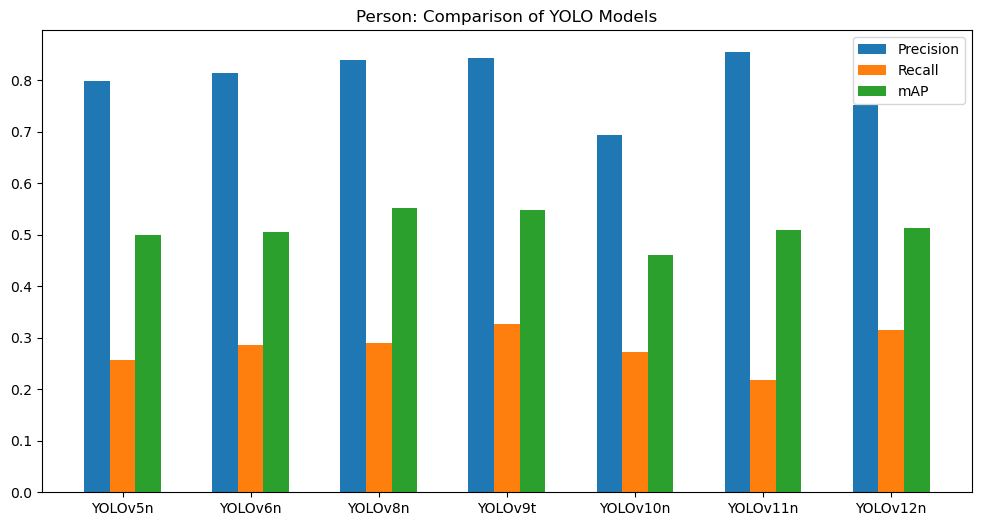

In [43]:
models = ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n']
metrics = ['Precision', 'Recall', 'mAP']
categories = ['Person', 'Car', 'Bicycle']

# Пример данных для Person (замените на реальные данные)
person_data = {
    'Precision': [0.799, 0.813, 0.839, 0.843, 0.694, 0.854, 0.751],
    'Recall': [0.256, 0.285, 0.29, 0.326, 0.272, 0.218, 0.315],
    'mAP': [0.499, 0.506, 0.551, 0.547, 0.461, 0.509, 0.512]
}

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, person_data[metric], width, label=metric)

ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.legend()
ax.set_title('Person: Comparison of YOLO Models')
plt.show()

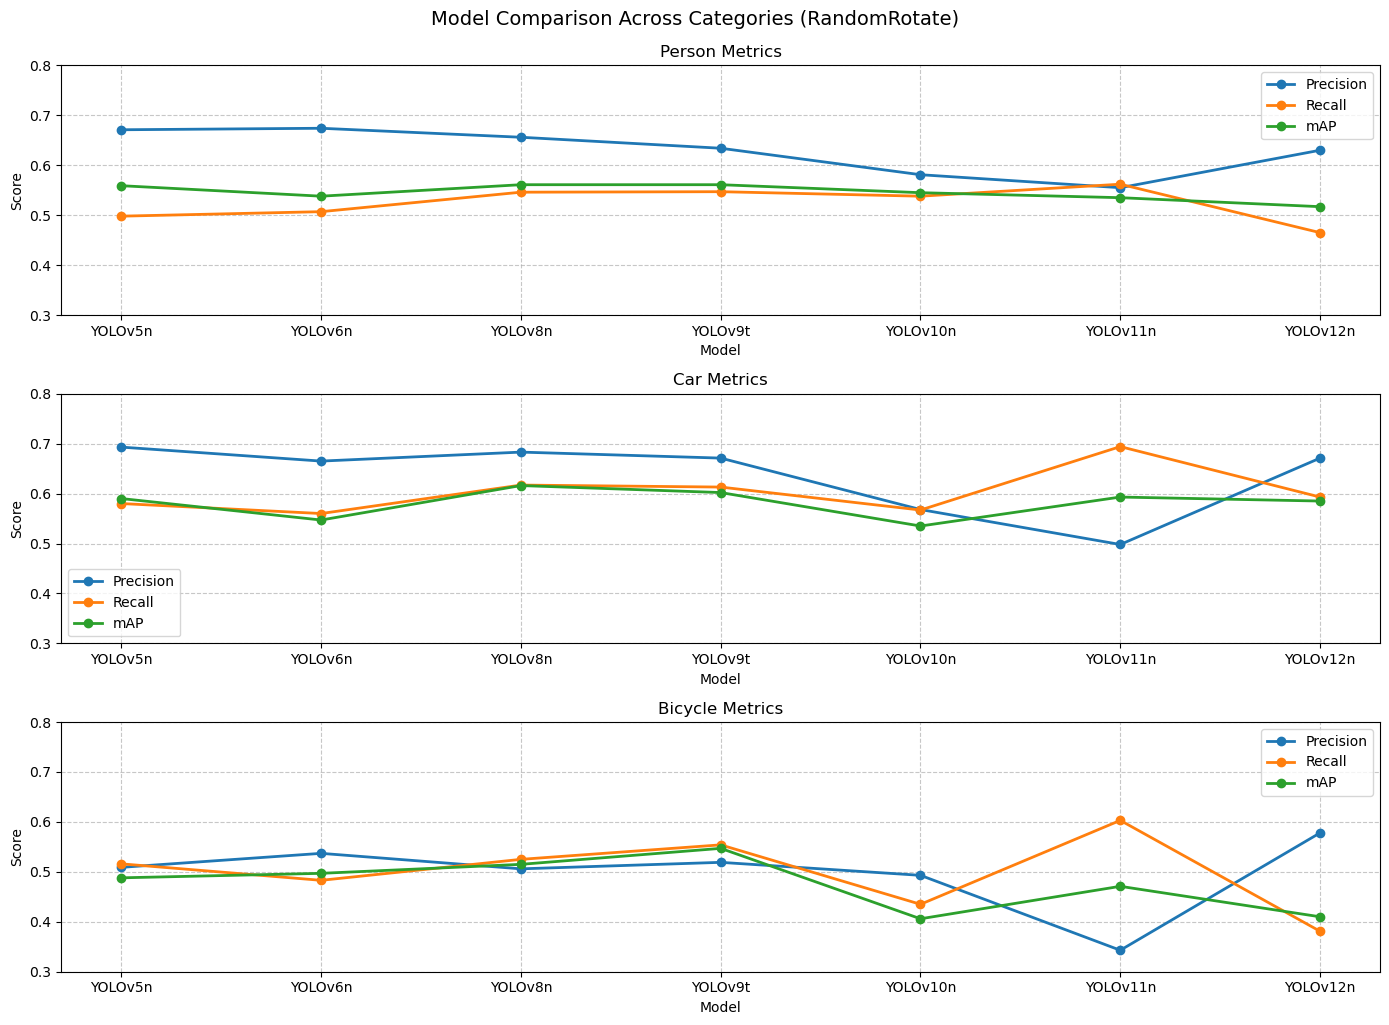

In [44]:
data = {
    'Model': ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n'],
    'Person_Precision': [0.671, 0.674, 0.656, 0.634, 0.581, 0.555, 0.63],
    'Person_Recall': [0.498, 0.507, 0.546, 0.547, 0.538, 0.562, 0.465],
    'Person_mAP': [0.559, 0.538, 0.561, 0.561, 0.545, 0.535, 0.517],
    'Car_Precision': [0.693, 0.665, 0.683, 0.671, 0.568, 0.498, 0.671],
    'Car_Recall': [0.58, 0.56, 0.617, 0.613, 0.567, 0.694, 0.593],
    'Car_mAP': [0.59, 0.547, 0.616, 0.602, 0.535, 0.593, 0.585],
    'Bicycle_Precision': [0.509, 0.537, 0.506, 0.519, 0.493, 0.343, 0.578],
    'Bicycle_Recall': [0.516, 0.483, 0.525, 0.554, 0.435, 0.603, 0.381],
    'Bicycle_mAP': [0.488, 0.497, 0.515, 0.547, 0.406, 0.471, 0.41]
}

df = pd.DataFrame(data)

plt.figure(figsize=(14, 10))

# Создаем 3 подграфика для каждой категории
categories = ['Person', 'Car', 'Bicycle']
metrics = ['Precision', 'Recall', 'mAP']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Цвета для метрик

for i, category in enumerate(categories, 1):
    plt.subplot(3, 1, i)
    
    for metric, color in zip(metrics, colors):
        plt.plot(
            df['Model'],
            df[f'{category}_{metric}'],
            marker='o',
            label=metric,
            color=color,
            linewidth=2
        )
    
    plt.title(f'{category} Metrics')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.ylim(0.3, 0.8)  # Фиксируем масштаб для сравнения
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

plt.tight_layout()
plt.suptitle('Model Comparison Across Categories (RandomRotate)', y=1.02, fontsize=14)
plt.show()

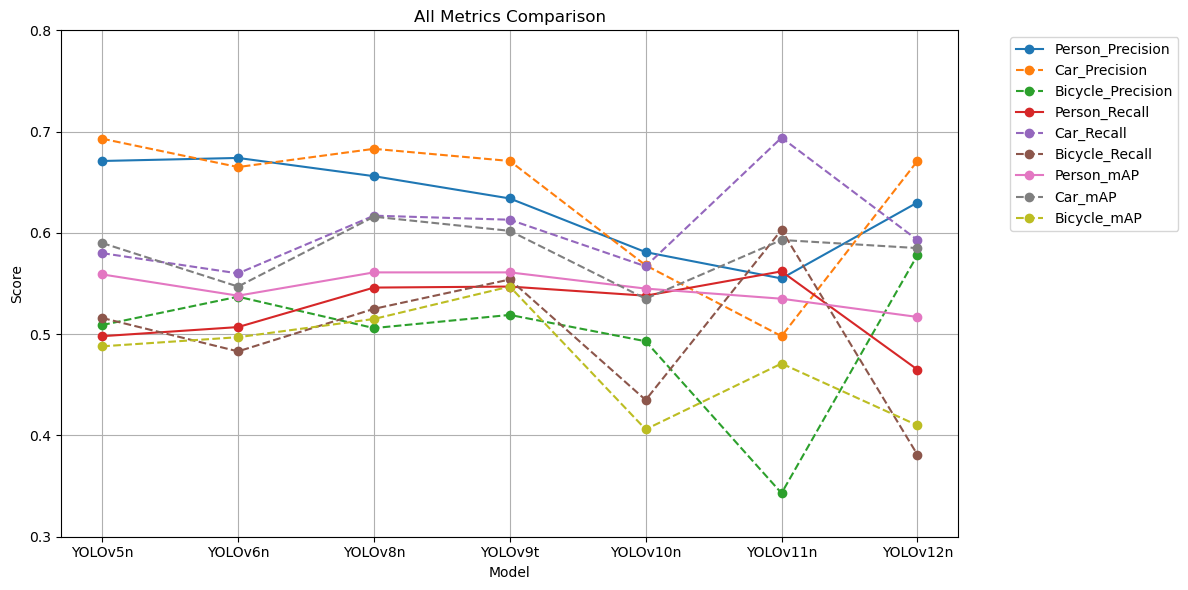

In [46]:
plt.figure(figsize=(12, 6))

for metric, color in zip(metrics, colors):
    for category in categories:
        plt.plot(
            df['Model'],
            df[f'{category}_{metric}'],
            marker='o',
            label=f'{category}_{metric}',
            linestyle='--' if category != 'Person' else '-',
            linewidth=1.5
        )

plt.title('All Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.3, 0.8)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

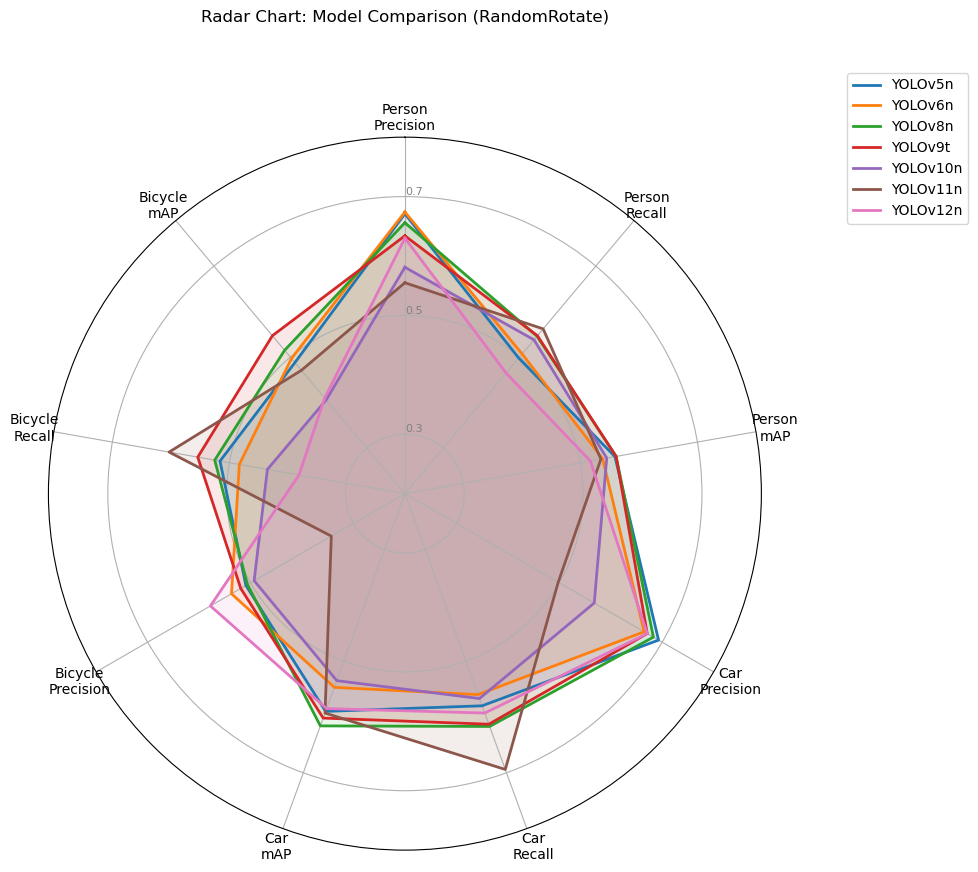

In [47]:
from math import pi

# Данные
categories = ['Person', 'Car', 'Bicycle']
metrics = ['Precision', 'Recall', 'mAP']
models = ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n']

# Создаем DataFrame из ваших данных
data = {
    'Model': models,
    'Person_Precision': [0.671, 0.674, 0.656, 0.634, 0.581, 0.555, 0.63],
    'Person_Recall': [0.498, 0.507, 0.546, 0.547, 0.538, 0.562, 0.465],
    'Person_mAP': [0.559, 0.538, 0.561, 0.561, 0.545, 0.535, 0.517],
    'Car_Precision': [0.693, 0.665, 0.683, 0.671, 0.568, 0.498, 0.671],
    'Car_Recall': [0.58, 0.56, 0.617, 0.613, 0.567, 0.694, 0.593],
    'Car_mAP': [0.59, 0.547, 0.616, 0.602, 0.535, 0.593, 0.585],
    'Bicycle_Precision': [0.509, 0.537, 0.506, 0.519, 0.493, 0.343, 0.578],
    'Bicycle_Recall': [0.516, 0.483, 0.525, 0.554, 0.435, 0.603, 0.381],
    'Bicycle_mAP': [0.488, 0.497, 0.515, 0.547, 0.406, 0.471, 0.41]
}
df = pd.DataFrame(data)
 
# Подготовка данных для радиальной диаграммы
labels = np.array([f"{cat}\n{met}" for cat in categories for met in metrics])
num_vars = len(labels)

# Углы для каждой оси
angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Замыкаем круг

colors = plt.cm.tab10.colors

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# Для каждой модели
for i, model in enumerate(models):
    values = []
    for cat in categories:
        for met in metrics:
            col_name = f"{cat}_{met}" if met != 'Precision' else f"{cat}_Precision"
            values.append(df.loc[df['Model'] == model, col_name].values[0])
    
    values += values[:1]  # Замыкаем линию
    ax.plot(angles, values, linewidth=2, linestyle='solid', 
            label=model, color=colors[i])
    ax.fill(angles, values, alpha=0.1)

# Настройка осей
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Установка пределов для радиальных осей
ax.set_rlabel_position(0)
plt.yticks([0.3, 0.5, 0.7], ["0.3", "0.5", "0.7"], color="grey", size=8)
plt.ylim(0.2, 0.8)

# Легенда и заголовок
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Chart: Model Comparison (RandomRotate)', y=1.15)

plt.tight_layout()
plt.show()

### Rotation Metrics Visualization

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем DataFrame из данных
data_5 = {
    'Модель': ['YOLOv5n'] * 11,
    "Угол поворота": [-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25],
    
    "Person_Precision": [0.535, 0.571, 0.539, 0.615, 0.779, 0.838, 0.779, 0.705, 0.67, 0.479, 0.573],
    "Person_Recall": [0.46, 0.503, 0.613, 0.646, 0.609, 0.643, 0.609, 0.567, 0.476, 0.545, 0.397],
    "Person_mAP": [0.435, 0.496, 0.57, 0.638, 0.709, 0.763, 0.709, 0.629, 0.539, 0.471, 0.426],
    
    "Car_Precision": [0.589, 0.641, 0.637, 0.725, 0.843, 0.836, 0.817, 0.764, 0.691, 0.514, 0.546],
    "Car_Recall": [0.493, 0.564, 0.691, 0.753, 0.741, 0.781, 0.762, 0.705, 0.579, 0.568, 0.455],
    "Car_mAP": [0.473, 0.547, 0.658, 0.774, 0.829, 0.863, 0.84, 0.769, 0.582, 0.459, 0.403],
    
    "Bicycle_Precision": [0.207, 0.286, 0.322, 0.432, 0.62, 0.614, 0.608, 0.528, 0.489, 0.245, 0.267],
    "Bicycle_Recall": [0.285, 0.349, 0.544, 0.625, 0.61, 0.688, 0.653, 0.609, 0.525, 0.521, 0.341],
    "Bicycle_mAP": [0.153, 0.236, 0.405, 0.567, 0.654, 0.704, 0.672, 0.599, 0.462, 0.305, 0.223]
}

df_5 = pd.DataFrame(data_5)

df_5

,Модель,Угол поворота,Person_Precision,Person_Recall,Person_mAP,Car_Precision,Car_Recall,Car_mAP,Bicycle_Precision,Bicycle_Recall,Bicycle_mAP
0,YOLOv5n,-25,0.535,0.460,0.435,0.589,0.493,0.473,0.207,0.285,0.153
1,YOLOv5n,-20,0.571,0.503,0.496,0.641,0.564,0.547,0.286,0.349,0.236
2,YOLOv5n,-15,0.539,0.613,0.570,0.637,0.691,0.658,0.322,0.544,0.405
3,YOLOv5n,-10,0.615,0.646,0.638,0.725,0.753,0.774,0.432,0.625,0.567
4,YOLOv5n,-5,0.779,0.609,0.709,0.843,0.741,0.829,0.620,0.610,0.654
5,YOLOv5n,0,0.838,0.643,0.763,0.836,0.781,0.863,0.614,0.688,0.704
6,YOLOv5n,5,0.779,0.609,0.709,0.817,0.762,0.840,0.608,0.653,0.672
7,YOLOv5n,10,0.705,0.567,0.629,0.764,0.705,0.769,0.528,0.609,0.599
8,YOLOv5n,15,0.670,0.476,0.539,0.691,0.579,0.582,0.489,0.525,0.462
9,YOLOv5n,20,0.479,0.545,0.471,0.514,0.568,0.459,0.245,0.521,0.305


In [53]:
import pandas as pd

# Создаем словарь с данными
data_6 = {
    'Модель': ['YOLOv6n'] * 11,
    'Угол поворота': [-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25],
    
    'Person_Precision': [0.541, 0.608, 0.656, 0.717, 0.759, 0.784, 0.776, 0.744, 0.668, 0.608, 0.563],
    'Person_Recall': [0.445, 0.483, 0.528, 0.573, 0.616, 0.647, 0.591, 0.518, 0.486, 0.443, 0.396],
    'Person_mAP': [0.417, 0.49, 0.544, 0.623, 0.683, 0.725, 0.675, 0.597, 0.522, 0.451, 0.402],
    
    'Car_Precision': [0.568, 0.633, 0.695, 0.788, 0.807, 0.841, 0.837, 0.79, 0.643, 0.544, 0.499],
    'Car_Recall': [0.489, 0.525, 0.587, 0.669, 0.736, 0.762, 0.73, 0.66, 0.547, 0.477, 0.446],
    'Car_mAP': [0.438, 0.507, 0.599, 0.743, 0.814, 0.852, 0.818, 0.736, 0.531, 0.404, 0.359],
    
    'Bicycle_Precision': [0.195, 0.327, 0.439, 0.584, 0.619, 0.665, 0.664, 0.631, 0.491, 0.373, 0.284],
    'Bicycle_Recall': [0.256, 0.326, 0.403, 0.48, 0.535, 0.564, 0.534, 0.506, 0.475, 0.448, 0.398],
    'Bicycle_mAP': [0.155, 0.264, 0.395, 0.525, 0.601, 0.647, 0.625, 0.568, 0.463, 0.353, 0.254]
}

# Создаем DataFrame
df_6 = pd.DataFrame(data_6)

# Выводим результат
df_6

,Модель,Угол поворота,Person_Precision,Person_Recall,Person_mAP,Car_Precision,Car_Recall,Car_mAP,Bicycle_Precision,Bicycle_Recall,Bicycle_mAP
0,YOLOv6n,-25,0.541,0.445,0.417,0.568,0.489,0.438,0.195,0.256,0.155
1,YOLOv6n,-20,0.608,0.483,0.490,0.633,0.525,0.507,0.327,0.326,0.264
2,YOLOv6n,-15,0.656,0.528,0.544,0.695,0.587,0.599,0.439,0.403,0.395
3,YOLOv6n,-10,0.717,0.573,0.623,0.788,0.669,0.743,0.584,0.480,0.525
4,YOLOv6n,-5,0.759,0.616,0.683,0.807,0.736,0.814,0.619,0.535,0.601
5,YOLOv6n,0,0.784,0.647,0.725,0.841,0.762,0.852,0.665,0.564,0.647
6,YOLOv6n,5,0.776,0.591,0.675,0.837,0.730,0.818,0.664,0.534,0.625
7,YOLOv6n,10,0.744,0.518,0.597,0.790,0.660,0.736,0.631,0.506,0.568
8,YOLOv6n,15,0.668,0.486,0.522,0.643,0.547,0.531,0.491,0.475,0.463
9,YOLOv6n,20,0.608,0.443,0.451,0.544,0.477,0.404,0.373,0.448,0.353


In [54]:
data_yolov8n = {
    'Модель': ['YOLOv8n'] * 11,
    'Угол поворота': [-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25],
    
    'Person_Precision': [0.529, 0.543, 0.625, 0.694, 0.776, 0.824, 0.758, 0.753, 0.608, 0.588, 0.541],
    'Person_Recall': [0.447, 0.551, 0.574, 0.61, 0.628, 0.669, 0.657, 0.538, 0.561, 0.474, 0.429],
    'Person_mAP': [0.427, 0.501, 0.557, 0.639, 0.711, 0.768, 0.723, 0.63, 0.537, 0.467, 0.416],
    
    'Car_Precision': [0.589, 0.598, 0.698, 0.783, 0.845, 0.868, 0.82, 0.831, 0.641, 0.6, 0.54],
    'Car_Recall': [0.526, 0.591, 0.659, 0.735, 0.767, 0.803, 0.782, 0.688, 0.61, 0.514, 0.47],
    'Car_mAP': [0.489, 0.553, 0.66, 0.785, 0.856, 0.887, 0.853, 0.783, 0.599, 0.484, 0.418],
    
    'Bicycle_Precision': [0.221, 0.265, 0.44, 0.554, 0.67, 0.682, 0.63, 0.686, 0.483, 0.402, 0.325],
    'Bicycle_Recall': [0.305, 0.411, 0.505, 0.555, 0.597, 0.674, 0.644, 0.527, 0.549, 0.429, 0.378],
    'Bicycle_mAP': [0.172, 0.239, 0.439, 0.578, 0.674, 0.719, 0.682, 0.625, 0.49, 0.366, 0.277]
}

# Создаем DataFrame
df_8 = pd.DataFrame(data_yolov8n)

# Выводим результат
df_8

,Модель,Угол поворота,Person_Precision,Person_Recall,Person_mAP,Car_Precision,Car_Recall,Car_mAP,Bicycle_Precision,Bicycle_Recall,Bicycle_mAP
0,YOLOv8n,-25,0.529,0.447,0.427,0.589,0.526,0.489,0.221,0.305,0.172
1,YOLOv8n,-20,0.543,0.551,0.501,0.598,0.591,0.553,0.265,0.411,0.239
2,YOLOv8n,-15,0.625,0.574,0.557,0.698,0.659,0.660,0.440,0.505,0.439
3,YOLOv8n,-10,0.694,0.610,0.639,0.783,0.735,0.785,0.554,0.555,0.578
4,YOLOv8n,-5,0.776,0.628,0.711,0.845,0.767,0.856,0.670,0.597,0.674
5,YOLOv8n,0,0.824,0.669,0.768,0.868,0.803,0.887,0.682,0.674,0.719
6,YOLOv8n,5,0.758,0.657,0.723,0.820,0.782,0.853,0.630,0.644,0.682
7,YOLOv8n,10,0.753,0.538,0.630,0.831,0.688,0.783,0.686,0.527,0.625
8,YOLOv8n,15,0.608,0.561,0.537,0.641,0.610,0.599,0.483,0.549,0.490
9,YOLOv8n,20,0.588,0.474,0.467,0.600,0.514,0.484,0.402,0.429,0.366


In [55]:
# Создаем словарь с данными
data_9t = {
    'Модель': ['YOLOv9t'] * 11,
    'Угол поворота': [-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25],
    
    'Person_Precision': [0.542, 0.445, 0.584, 0.697, 0.756, 0.803, 0.737, 0.676, 0.671, 0.608, 0.564],
    'Person_Recall': [0.431, 0.605, 0.591, 0.582, 0.621, 0.672, 0.655, 0.605, 0.528, 0.473, 0.43],
    'Person_mAP': [0.416, 0.493, 0.555, 0.636, 0.692, 0.741, 0.712, 0.633, 0.555, 0.486, 0.424],
    
    'Car_Precision': [0.618, 0.532, 0.662, 0.785, 0.849, 0.863, 0.839, 0.782, 0.686, 0.604, 0.525],
    'Car_Recall': [0.496, 0.619, 0.658, 0.723, 0.763, 0.803, 0.788, 0.739, 0.584, 0.512, 0.454],
    'Car_mAP': [0.47, 0.525, 0.646, 0.769, 0.833, 0.879, 0.854, 0.781, 0.589, 0.49, 0.407],
    
    'Bicycle_Precision': [0.27, 0.234, 0.398, 0.573, 0.668, 0.676, 0.658, 0.598, 0.582, 0.471, 0.361],
    'Bicycle_Recall': [0.313, 0.526, 0.536, 0.541, 0.586, 0.621, 0.618, 0.61, 0.541, 0.49, 0.402],
    'Bicycle_mAP': [0.219, 0.321, 0.454, 0.571, 0.655, 0.692, 0.685, 0.645, 0.536, 0.418, 0.288]
}

# Создаем DataFrame
df_9 = pd.DataFrame(data_9t)

# Выводим результат
df_9

,Модель,Угол поворота,Person_Precision,Person_Recall,Person_mAP,Car_Precision,Car_Recall,Car_mAP,Bicycle_Precision,Bicycle_Recall,Bicycle_mAP
0,YOLOv9t,-25,0.542,0.431,0.416,0.618,0.496,0.470,0.270,0.313,0.219
1,YOLOv9t,-20,0.445,0.605,0.493,0.532,0.619,0.525,0.234,0.526,0.321
2,YOLOv9t,-15,0.584,0.591,0.555,0.662,0.658,0.646,0.398,0.536,0.454
3,YOLOv9t,-10,0.697,0.582,0.636,0.785,0.723,0.769,0.573,0.541,0.571
4,YOLOv9t,-5,0.756,0.621,0.692,0.849,0.763,0.833,0.668,0.586,0.655
5,YOLOv9t,0,0.803,0.672,0.741,0.863,0.803,0.879,0.676,0.621,0.692
6,YOLOv9t,5,0.737,0.655,0.712,0.839,0.788,0.854,0.658,0.618,0.685
7,YOLOv9t,10,0.676,0.605,0.633,0.782,0.739,0.781,0.598,0.610,0.645
8,YOLOv9t,15,0.671,0.528,0.555,0.686,0.584,0.589,0.582,0.541,0.536
9,YOLOv9t,20,0.608,0.473,0.486,0.604,0.512,0.490,0.471,0.490,0.418


In [56]:
# Создаем словарь с данными для YOLOv10n
data_10n = {
    'Модель': ['YOLOv10n'] * 11,
    'Угол поворота': [-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25],
    
    'Person_Precision': [0.478, 0.535, 0.458, 0.585, 0.666, 0.661, 0.693, 0.625, 0.506, 0.582, 0.514],
    'Person_Recall': [0.473, 0.499, 0.622, 0.607, 0.598, 0.675, 0.598, 0.583, 0.578, 0.467, 0.423],
    'Person_mAP': [0.4, 0.472, 0.534, 0.596, 0.665, 0.715, 0.668, 0.601, 0.518, 0.467, 0.393],
    
    'Car_Precision': [0.481, 0.515, 0.485, 0.619, 0.703, 0.665, 0.701, 0.635, 0.492, 0.513, 0.438],
    'Car_Recall': [0.456, 0.503, 0.639, 0.695, 0.717, 0.788, 0.729, 0.688, 0.597, 0.483, 0.418],
    'Car_mAP': [0.385, 0.441, 0.548, 0.692, 0.772, 0.808, 0.777, 0.694, 0.519, 0.406, 0.351],
    
    'Bicycle_Precision': [0.188, 0.286, 0.283, 0.458, 0.617, 0.611, 0.639, 0.539, 0.384, 0.405, 0.307],
    'Bicycle_Recall': [0.221, 0.274, 0.484, 0.492, 0.492, 0.594, 0.508, 0.502, 0.519, 0.371, 0.327],
    'Bicycle_mAP': [0.11, 0.192, 0.347, 0.467, 0.549, 0.621, 0.586, 0.507, 0.406, 0.277, 0.19]
}

# Создаем DataFrame
df_10 = pd.DataFrame(data_10n)

# Выводим результат
df_10

,Модель,Угол поворота,Person_Precision,Person_Recall,Person_mAP,Car_Precision,Car_Recall,Car_mAP,Bicycle_Precision,Bicycle_Recall,Bicycle_mAP
0,YOLOv10n,-25,0.478,0.473,0.400,0.481,0.456,0.385,0.188,0.221,0.110
1,YOLOv10n,-20,0.535,0.499,0.472,0.515,0.503,0.441,0.286,0.274,0.192
2,YOLOv10n,-15,0.458,0.622,0.534,0.485,0.639,0.548,0.283,0.484,0.347
3,YOLOv10n,-10,0.585,0.607,0.596,0.619,0.695,0.692,0.458,0.492,0.467
4,YOLOv10n,-5,0.666,0.598,0.665,0.703,0.717,0.772,0.617,0.492,0.549
5,YOLOv10n,0,0.661,0.675,0.715,0.665,0.788,0.808,0.611,0.594,0.621
6,YOLOv10n,5,0.693,0.598,0.668,0.701,0.729,0.777,0.639,0.508,0.586
7,YOLOv10n,10,0.625,0.583,0.601,0.635,0.688,0.694,0.539,0.502,0.507
8,YOLOv10n,15,0.506,0.578,0.518,0.492,0.597,0.519,0.384,0.519,0.406
9,YOLOv10n,20,0.582,0.467,0.467,0.513,0.483,0.406,0.405,0.371,0.277


In [57]:
# Создаем словарь с данными для YOLOv11n
data_11n = {
    'Модель': ['YOLOv11n'] * 11,
    'Угол поворота': [-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25],
    
    'Person_Precision': [0.533, 0.608, 0.541, 0.641, 0.739, 0.832, 0.768, 0.713, 0.667, 0.537, 0.435],
    'Person_Recall': [0.385, 0.416, 0.554, 0.583, 0.597, 0.594, 0.558, 0.509, 0.436, 0.481, 0.507],
    'Person_mAP': [0.401, 0.459, 0.514, 0.603, 0.67, 0.729, 0.669, 0.591, 0.517, 0.457, 0.401],
    
    'Car_Precision': [0.53, 0.595, 0.52, 0.643, 0.722, 0.798, 0.743, 0.693, 0.616, 0.446, 0.352],
    'Car_Recall': [0.534, 0.591, 0.706, 0.792, 0.812, 0.813, 0.799, 0.755, 0.624, 0.583, 0.564],
    'Car_mAP': [0.466, 0.547, 0.632, 0.782, 0.835, 0.872, 0.839, 0.765, 0.569, 0.458, 0.398],
    
    'Bicycle_Precision': [0.209, 0.309, 0.3, 0.41, 0.543, 0.655, 0.563, 0.496, 0.446, 0.274, 0.172],
    'Bicycle_Recall': [0.287, 0.338, 0.527, 0.576, 0.597, 0.608, 0.594, 0.547, 0.477, 0.512, 0.497],
    'Bicycle_mAP': [0.159, 0.233, 0.398, 0.519, 0.594, 0.664, 0.605, 0.522, 0.431, 0.33, 0.236]
}

# Создаем DataFrame
df_11 = pd.DataFrame(data_11n)

# Выводим результат
df_11

,Модель,Угол поворота,Person_Precision,Person_Recall,Person_mAP,Car_Precision,Car_Recall,Car_mAP,Bicycle_Precision,Bicycle_Recall,Bicycle_mAP
0,YOLOv11n,-25,0.533,0.385,0.401,0.530,0.534,0.466,0.209,0.287,0.159
1,YOLOv11n,-20,0.608,0.416,0.459,0.595,0.591,0.547,0.309,0.338,0.233
2,YOLOv11n,-15,0.541,0.554,0.514,0.520,0.706,0.632,0.300,0.527,0.398
3,YOLOv11n,-10,0.641,0.583,0.603,0.643,0.792,0.782,0.410,0.576,0.519
4,YOLOv11n,-5,0.739,0.597,0.670,0.722,0.812,0.835,0.543,0.597,0.594
5,YOLOv11n,0,0.832,0.594,0.729,0.798,0.813,0.872,0.655,0.608,0.664
6,YOLOv11n,5,0.768,0.558,0.669,0.743,0.799,0.839,0.563,0.594,0.605
7,YOLOv11n,10,0.713,0.509,0.591,0.693,0.755,0.765,0.496,0.547,0.522
8,YOLOv11n,15,0.667,0.436,0.517,0.616,0.624,0.569,0.446,0.477,0.431
9,YOLOv11n,20,0.537,0.481,0.457,0.446,0.583,0.458,0.274,0.512,0.330


In [58]:
# Создаем словарь с данными для YOLOv12n
data_12n = {
    'Модель': ['YOLOv12n'] * 11,
    'Угол поворота': [-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25],
    
    'Person_Precision': [0.517, 0.562, 0.57, 0.637, 0.712, 0.756, 0.721, 0.638, 0.498, 0.521, 0.491],
    'Person_Recall': [0.433, 0.474, 0.531, 0.562, 0.575, 0.606, 0.558, 0.515, 0.561, 0.444, 0.403],
    'Person_mAP': [0.403, 0.47, 0.514, 0.581, 0.642, 0.688, 0.638, 0.561, 0.488, 0.425, 0.371],
    
    'Car_Precision': [0.56, 0.611, 0.628, 0.717, 0.775, 0.807, 0.774, 0.726, 0.535, 0.545, 0.515],
    'Car_Recall': [0.499, 0.565, 0.651, 0.72, 0.734, 0.771, 0.744, 0.716, 0.637, 0.521, 0.473],
    'Car_mAP': [0.456, 0.532, 0.632, 0.749, 0.8, 0.842, 0.802, 0.755, 0.576, 0.465, 0.412],
    
    'Bicycle_Precision': [0.244, 0.333, 0.436, 0.53, 0.645, 0.699, 0.653, 0.58, 0.374, 0.365, 0.308],
    'Bicycle_Recall': [0.2, 0.257, 0.366, 0.385, 0.387, 0.485, 0.455, 0.443, 0.49, 0.374, 0.296],
    'Bicycle_mAP': [0.14, 0.213, 0.346, 0.431, 0.505, 0.583, 0.529, 0.475, 0.377, 0.27, 0.189]
}

# Создаем DataFrame
df_12 = pd.DataFrame(data_12n)

# Выводим результат
df_12

,Модель,Угол поворота,Person_Precision,Person_Recall,Person_mAP,Car_Precision,Car_Recall,Car_mAP,Bicycle_Precision,Bicycle_Recall,Bicycle_mAP
0,YOLOv12n,-25,0.517,0.433,0.403,0.560,0.499,0.456,0.244,0.200,0.140
1,YOLOv12n,-20,0.562,0.474,0.470,0.611,0.565,0.532,0.333,0.257,0.213
2,YOLOv12n,-15,0.570,0.531,0.514,0.628,0.651,0.632,0.436,0.366,0.346
3,YOLOv12n,-10,0.637,0.562,0.581,0.717,0.720,0.749,0.530,0.385,0.431
4,YOLOv12n,-5,0.712,0.575,0.642,0.775,0.734,0.800,0.645,0.387,0.505
5,YOLOv12n,0,0.756,0.606,0.688,0.807,0.771,0.842,0.699,0.485,0.583
6,YOLOv12n,5,0.721,0.558,0.638,0.774,0.744,0.802,0.653,0.455,0.529
7,YOLOv12n,10,0.638,0.515,0.561,0.726,0.716,0.755,0.580,0.443,0.475
8,YOLOv12n,15,0.498,0.561,0.488,0.535,0.637,0.576,0.374,0.490,0.377
9,YOLOv12n,20,0.521,0.444,0.425,0.545,0.521,0.465,0.365,0.374,0.270


In [42]:
def plot_rotation_metrics(df, version, metric):
    # Настройка стиля графиков
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    
    # Построение линий для каждого класса
    plt.plot(df['Угол поворота'], df[f'Person_{metric}'], marker='o', label=f'Person {metric}', color='blue')
    plt.plot(df['Угол поворота'], df[f'Car_{metric}'], marker='s', label=f'Car {metric}', color='green')
    plt.plot(df['Угол поворота'], df[f'Bicycle_{metric}'], marker='^', label=f'Bicycle {metric}', color='red')
    
    # Настройка графика
    plt.title(f"Зависимость {metric} от угла поворота ({version})", fontsize=16)
    plt.xlabel("Угол поворота (градусы)", fontsize=12)
    plt.ylabel(f"{metric}", fontsize=12)
    plt.xticks(df['Угол поворота'])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Добавление аннотации с моделью
    plt.text(0.02, 0.02, f'Модель: {version}', transform=plt.gca().transAxes,
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

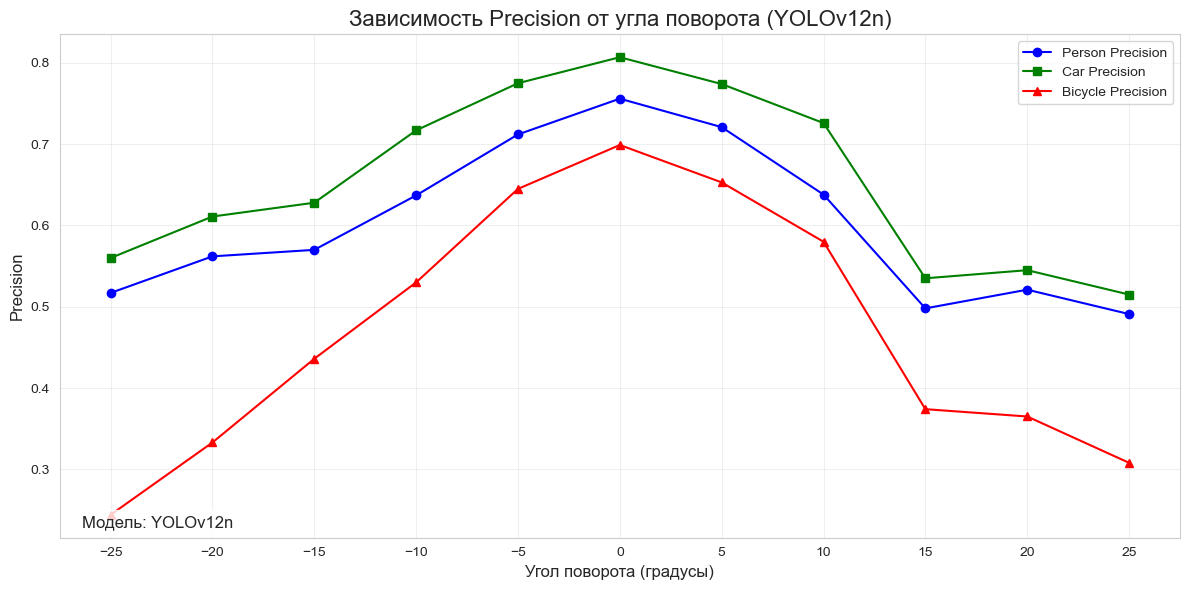

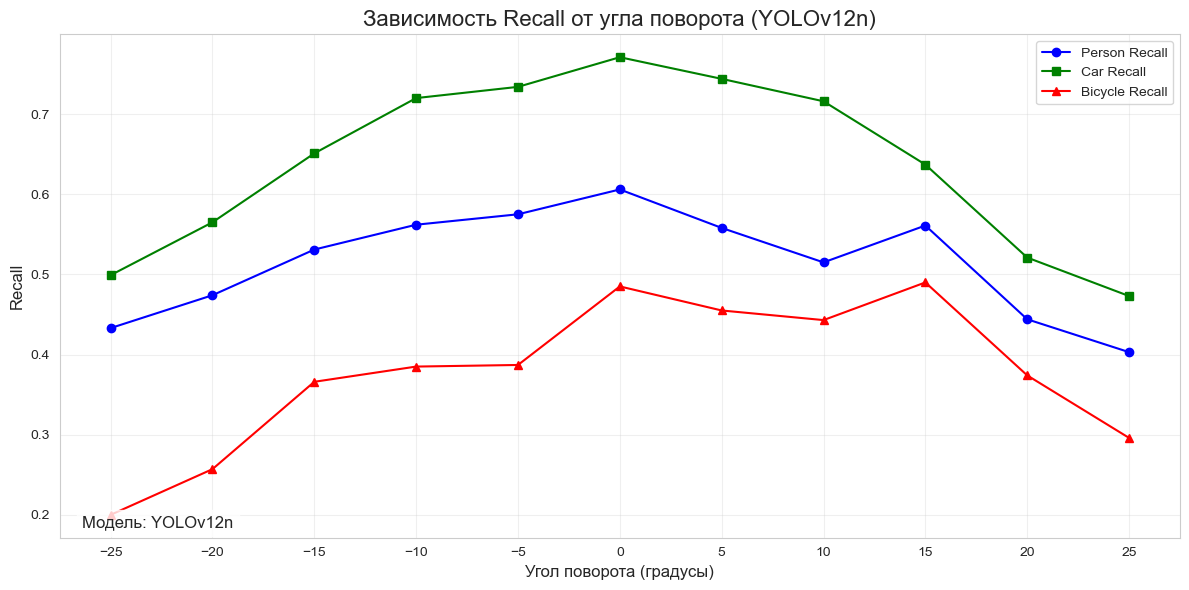

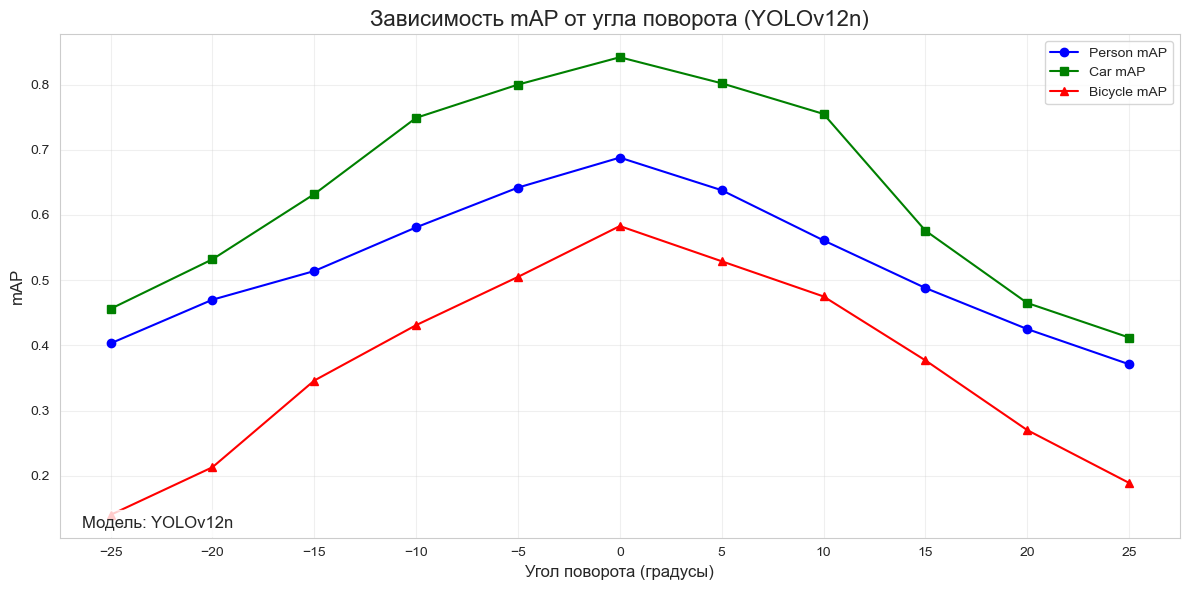

In [56]:
plot_rotation_metrics(df_12, 'YOLOv12n', 'Precision')
plot_rotation_metrics(df_12, 'YOLOv12n', 'Recall')
plot_rotation_metrics(df_12, 'YOLOv12n', 'mAP')

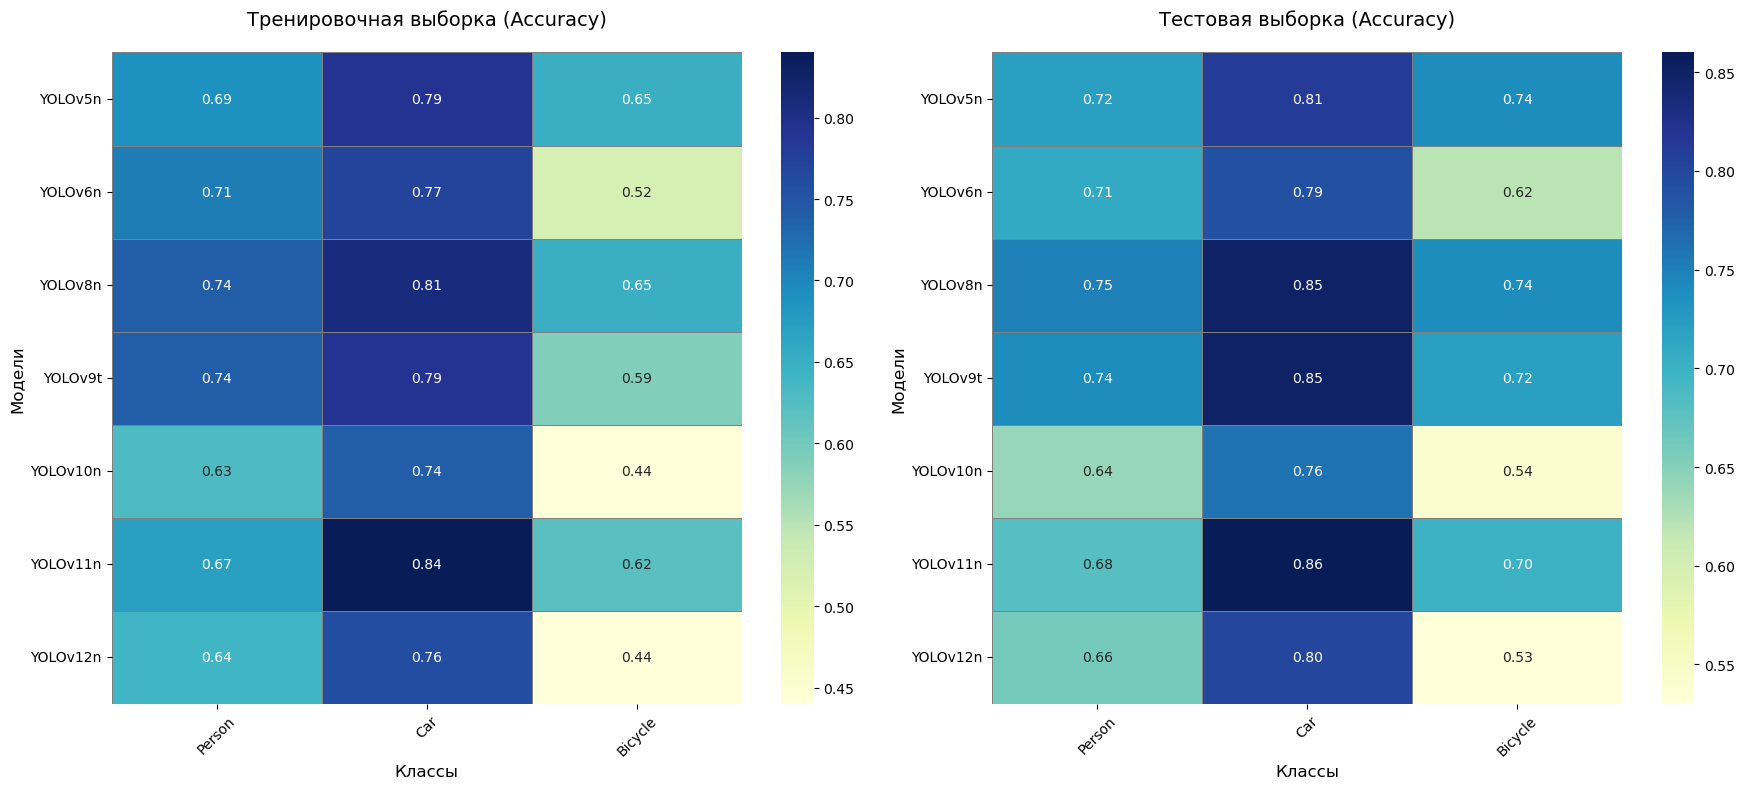

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ваши данные
data = {
    'Model': ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n'],
    'Train_Person': [0.69, 0.71, 0.74, 0.74, 0.63, 0.67, 0.64],
    'Train_Car': [0.79, 0.77, 0.81, 0.79, 0.74, 0.84, 0.76],
    'Train_Bicycle': [0.65, 0.52, 0.65, 0.59, 0.44, 0.62, 0.44],
    'Test_Person': [0.72, 0.71, 0.75, 0.74, 0.64, 0.68, 0.66],
    'Test_Car': [0.81, 0.79, 0.85, 0.85, 0.76, 0.86, 0.80],
    'Test_Bicycle': [0.74, 0.62, 0.74, 0.72, 0.54, 0.70, 0.53]
}

df = pd.DataFrame(data)

# Создаем subplot для тренировочной и тестовой выборок
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Функция для построения heatmap
def plot_heatmap(data, ax, title):
    sns.heatmap(data, 
                annot=True, 
                fmt=".2f", 
                cmap="YlGnBu",
                cbar=True,
                linewidths=0.5,
                linecolor='grey',
                ax=ax)
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel('Классы', fontsize=12)
    ax.set_ylabel('Модели', fontsize=12)
    ax.set_xticklabels(['Person', 'Car', 'Bicycle'], rotation=45)
    ax.set_yticklabels(df['Model'], rotation=0)

# Тренировочная выборка
train_data = df[['Train_Person', 'Train_Car', 'Train_Bicycle']].values
plot_heatmap(train_data, axes[0], 'Тренировочная выборка (Accuracy)')

# Тестовая выборка
test_data = df[['Test_Person', 'Test_Car', 'Test_Bicycle']].values
plot_heatmap(test_data, axes[1], 'Тестовая выборка (Accuracy)')

plt.tight_layout()
plt.show()

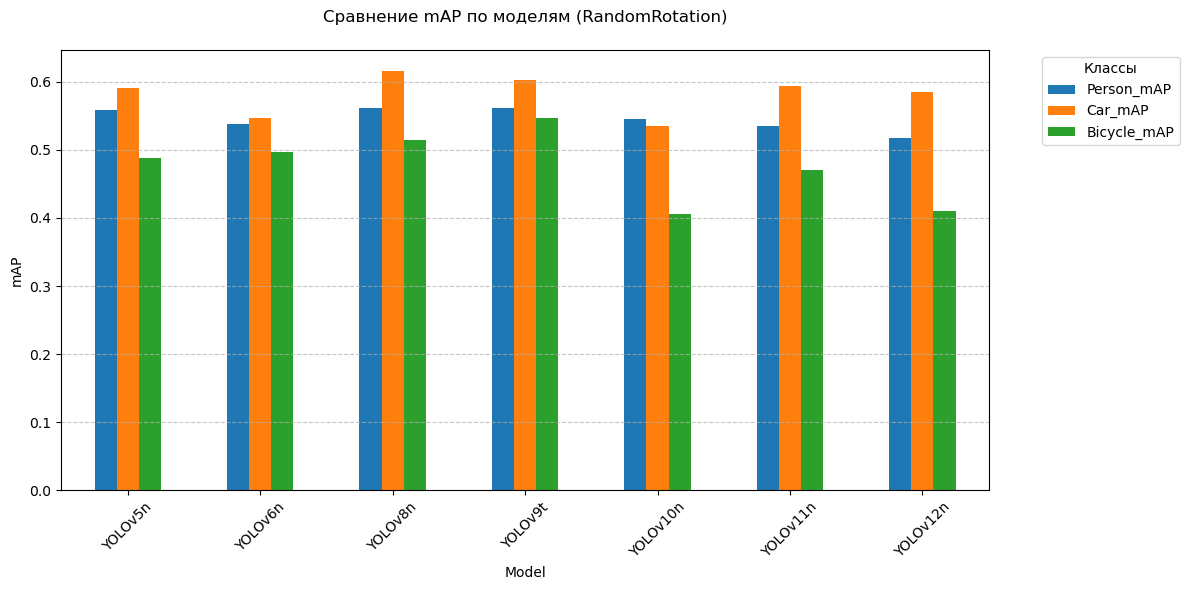

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Model': ['YOLOv5n', 'YOLOv6n', 'YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n', 'YOLOv12n'],
    'Person_mAP': [0.559, 0.538, 0.561, 0.561, 0.545, 0.535, 0.517],
    'Car_mAP': [0.59, 0.547, 0.616, 0.602, 0.535, 0.593, 0.585],
    'Bicycle_mAP': [0.488, 0.497, 0.515, 0.547, 0.406, 0.471, 0.41]
}

df = pd.DataFrame(data)
df.set_index('Model').plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Сравнение mAP по моделям (RandomRotation)', pad=20)
plt.ylabel('mAP')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Классы', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

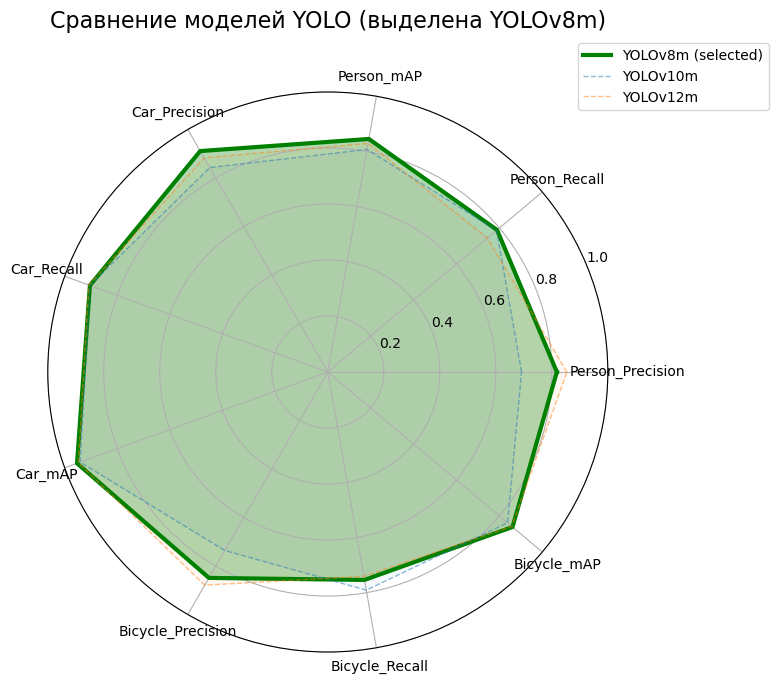

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Данные
data_test = {
    'Model': ['YOLOv8m', 'YOLOv10m', 'YOLOv12m'],
    'Person_Precision': [0.818, 0.692, 0.854],
    'Person_Recall': [0.789, 0.787, 0.744],
    'Person_mAP': [0.845, 0.807, 0.829],
    'Car_Precision': [0.911, 0.843, 0.883],
    'Car_Recall': [0.904, 0.904, 0.908],
    'Car_mAP': [0.953, 0.941, 0.948],
    'Bicycle_Precision': [0.849, 0.736, 0.879],
    'Bicycle_Recall': [0.754, 0.791, 0.741],
    'Bicycle_mAP': [0.861, 0.838, 0.858]
}

test_results = pd.DataFrame(data_test)
test_results.columns = test_results.columns.str.replace('Test_', '')

# Выбор модели для выделения (измените на нужную)
selected_model = 'YOLOv8m'  # Пример: выделяем YOLOv8n

# Параметры графика
categories = ['Person_Precision', 'Person_Recall', 'Person_mAP', 
              'Car_Precision', 'Car_Recall', 'Car_mAP',
              'Bicycle_Precision', 'Bicycle_Recall', 'Bicycle_mAP']
N = len(categories)

# Углы для осей radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Замыкаем круг

# Инициализация radar chart
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

# Построение всех моделей (полупрозрачными)
for idx, model in enumerate(test_results['Model']):
    values = test_results.loc[idx, categories].values.flatten().tolist()
    values += values[:1]
    
    if model == selected_model:
        # Выделяем выбранную модель (жирная линия + насыщенная заливка)
        plt.plot(angles, values, linewidth=3, linestyle='solid', 
                label=f'{model} (selected)', color='green')
        plt.fill(angles, values, alpha=0.3, color='green')
    else:
        # Остальные модели (бледные)
        plt.plot(angles, values, linewidth=1, linestyle='dashed', 
                label=model, alpha=0.5)
        plt.fill(angles, values, alpha=0.05)

# Настройка осей
plt.title(f'Сравнение моделей YOLO (выделена {selected_model})', size=16, y=1.1)
plt.xticks(angles[:-1], categories, size=10)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['0.2', '0.4', '0.6', '0.8', '1.0'], size=10)
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.show()

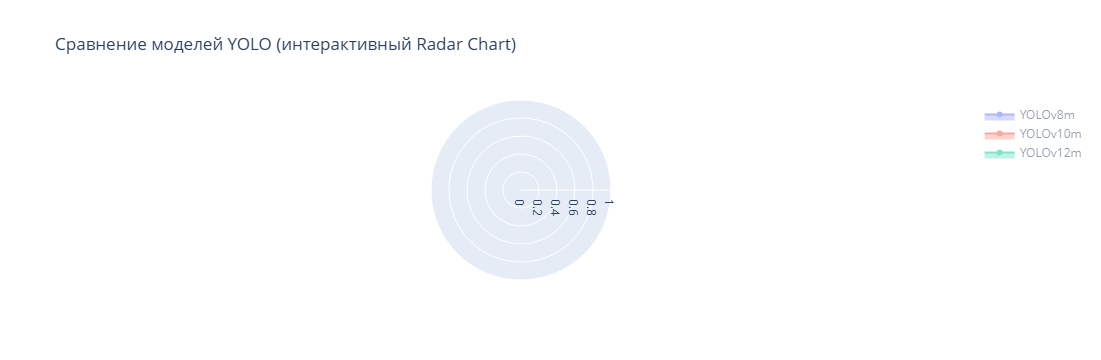

In [90]:
import plotly.express as px
import plotly.graph_objects as go

# Подготовка данных в "длинном" формате
df_melted = test_results.melt(id_vars='Model', value_vars=categories, 
                             var_name='Metric', value_name='Value')

# Создание radar chart
fig = go.Figure()

for model in test_results['Model']:
    fig.add_trace(go.Scatterpolar(
        r=df_melted[df_melted['Model'] == model]['Value'],
        theta=df_melted[df_melted['Model'] == model]['Metric'],
        fill='toself',
        name=model
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title='Сравнение моделей YOLO (интерактивный Radar Chart)'
)

fig.show()